## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df= df.dropna()


In [5]:
df_numerics = df.select_dtypes(include = np.number, exclude = object)

In [6]:
df_numerics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   price          15762 non-null  float64
 2   bedrooms       15762 non-null  int64  
 3   bathrooms      15762 non-null  float64
 4   sqft_living    15762 non-null  int64  
 5   sqft_lot       15762 non-null  int64  
 6   floors         15762 non-null  float64
 7   sqft_above     15762 non-null  int64  
 8   yr_built       15762 non-null  int64  
 9   yr_renovated   15762 non-null  float64
 10  zipcode        15762 non-null  int64  
 11  lat            15762 non-null  float64
 12  long           15762 non-null  float64
 13  sqft_living15  15762 non-null  int64  
 14  sqft_lot15     15762 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 1.9 MB


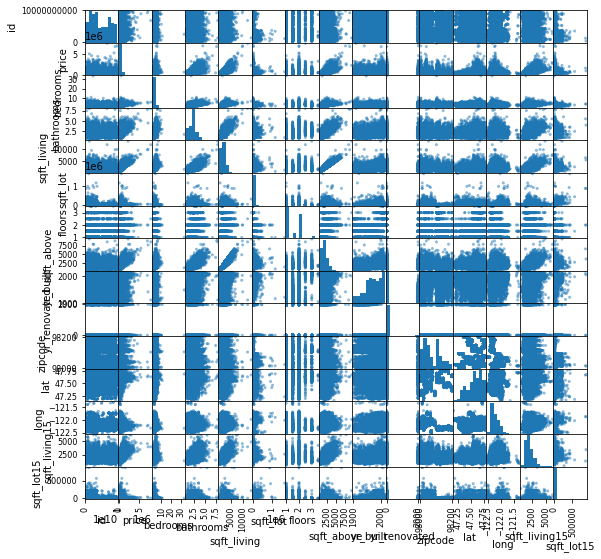

In [7]:
# use pd.plotting.scatter_matrix
pd.plotting.scatter_matrix(df_numerics,figsize  = [9, 9]);

In [8]:
y = df_numerics['price']
x = sm.add_constant(df_numerics.drop(columns='price'))

/Users/danielbradley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
model = sm.OLS(y,x).fit()

<AxesSubplot:>

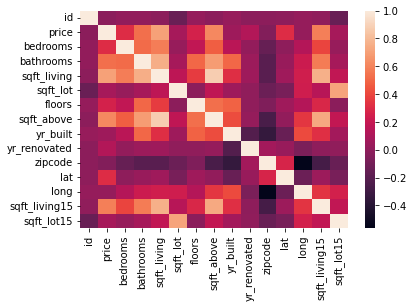

In [10]:
import seaborn as sns

Var_Corr = df_numerics.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

In [11]:
df_numerics.columns[0]

'id'

TypeError: 'DataFrame' object is not callable

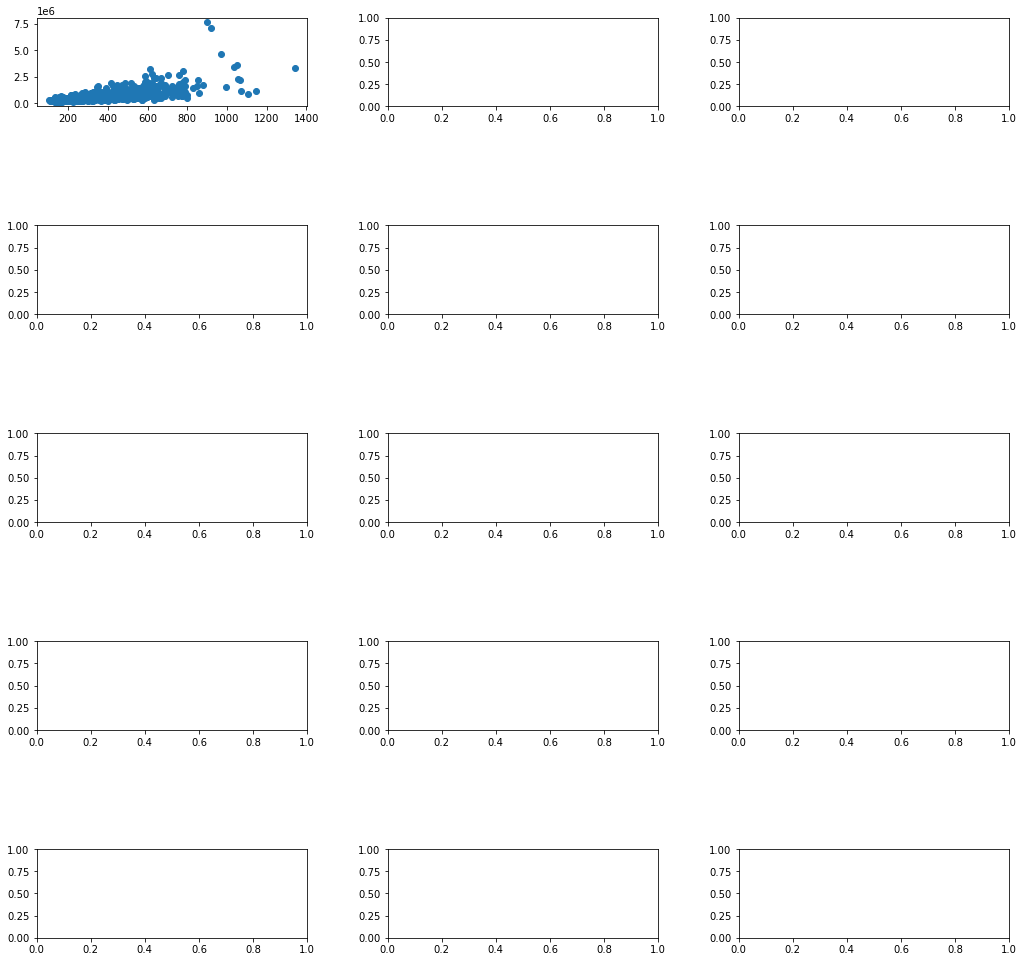

In [29]:
fig, axs = plt.subplots(5,3)
plt.tight_layout()

fig.set_figheight(15)
fig.set_figwidth(15)

independants = df_numerics.drop(columns='price')
dependant = df_numerics['price']
column_num = 0

for i in range(5):
    for j in range(3):
        axs[i,j].scatter(independants.iloc[:,(column_num-1)],dependant)
        axs[i,j].set_title('{} vs. Sales'.format(independants(column_num)))
        column_num += 1

In [24]:
df_numerics = df_numerics.loc[df_numerics['yr_renovated'] != 0]

<AxesSubplot:xlabel='yr_renovated', ylabel='price_per_sqfoot'>

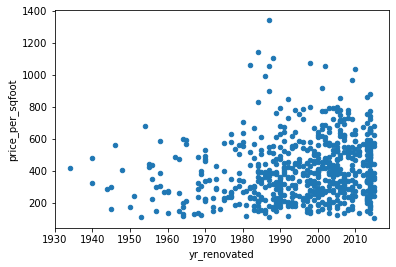

In [27]:
#make a price / sq ft
#Scatter yr. renovate vs. price / sq foot
df_numerics['price_per_sqfoot'] = df_numerics['price'] / df_numerics['sqft_above']
df_numerics.plot.scatter('yr_renovated','price_per_sqfoot')

In [17]:
df_upper_income = df_numerics.loc[df_numerics['price'] >= df_numerics['price'].mean()]
df_upper_income

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,3890,2001,0.0,98053,47.6561,-122.005,4760,101930
15,9297300055,650000.0,4,3.00,2950,5000,2.0,1980,1979,0.0,98126,47.5714,-122.375,2140,4000
21,2524049179,2000000.0,3,2.75,3050,44867,1.0,2330,1968,0.0,98040,47.5316,-122.233,4110,20336
27,3303700376,667000.0,3,1.00,1400,1581,1.5,1400,1909,0.0,98112,47.6221,-122.314,1860,3861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,7853420110,594866.0,3,3.00,2780,6000,2.0,2780,2013,0.0,98065,47.5184,-121.886,2850,6000
21574,7430200100,1220000.0,4,3.50,4910,9444,1.5,3110,2007,0.0,98074,47.6502,-122.066,4560,11063
21580,7502800100,679950.0,5,2.75,3600,9437,2.0,3600,2014,0.0,98059,47.4822,-122.131,3550,9421
21584,249000205,1540000.0,5,3.75,4470,8088,2.0,4470,2008,0.0,98004,47.6321,-122.200,2780,8964


In [30]:
import folium

lat = df_renovated['lat']
long = df_renovated['long']

#Create a map of the area
base_map = folium.Map([lat.mean(), long.mean()], zoom_start=50)

for lat1,long1 in zip(lat,long):
     popup_text = 'Lat: {} \n Long: {}'.format(lat1,long1)
     popup = folium.Popup(popup_text, parse_html=True)
     marker = folium.Marker(location=[lat1, long1], popup = popup)
     marker.add_to(base_map)
     
base_map


In [31]:
df_numerics.loc[df_numerics['lat'] == 47.6036]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqfoot
12830,9826701345,498000.0,3,2.5,1620,2640,2.0,1620,1900,1993.0,98122,47.6036,-122.305,1370,3840,307.407407


## Combining seattle AirBNB data with seattle housing data 

In [48]:
bnb_listings = pd.read_csv('data/listings.csv')
bnb_listings['longitude'] = round(bnb_listings['longitude'],3)
bnb_listings['long'] = bnb_listings['longitude']
bnb_listings['latitude'] = round(bnb_listings['latitude'],3)
bnb_listings['lat'] = bnb_listings['latitude']

In [49]:
merged = df.merge(bnb_listings, how = 'inner', on = ['long','lat'])

In [50]:
merged.shape

(82, 113)

In [52]:
lat = merged['lat']
long = merged['long']

#Create a map of the area
base_map = folium.Map([lat.mean(), long.mean()], zoom_start=50)

for lat1,long1 in zip(lat,long):
     popup_text = 'Lat: {} \n Long: {}'.format(lat1,long1)
     popup = folium.Popup(popup_text, parse_html=True)
     marker = folium.Marker(location=[lat1, long1], popup = popup)
     marker.add_to(base_map)
     
base_map